In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Load data from a CSV file
df = pd.read_csv('dataset.csv')

# Apply label encoding to the 'state' column
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])

df.tail()

,client_id,sex,age,state,risk_profile,invest_goals,temp_goals,fin_exp,fin_avail,a1,...,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20
1166,5146755,1,69,25,4,14,17,10,19,0.167,...,0.0,0.095,0.0,0.020,0.0,0.0,0.181,0.000,0.000,0.0
1167,5738347,1,56,11,3,13,17,11,19,0.034,...,0.0,0.065,0.0,0.068,0.0,0.0,0.000,0.065,0.049,0.0
1168,8516725,1,64,24,4,13,17,11,19,0.178,...,0.0,0.000,0.0,0.055,0.0,0.0,0.023,0.000,0.000,0.0
1169,14240215,1,57,11,3,13,17,10,19,0.009,...,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
1170,14326270,0,51,14,3,13,17,11,19,0.184,...,0.0,0.000,0.0,0.006,0.0,0.0,0.018,0.000,0.000,0.0


In [2]:
# 'data' contains columns 'sex', 'age', 'state', 'risk_profile', 'invest_goals', 'temp_goals', 'fin_exp', 'fin_avail'
data = df[['sex', 'age', 'state', 'risk_profile', 'invest_goals', 'temp_goals', 'fin_exp', 'fin_avail']].values

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# 'targets' contains columns 'a1' through 'a20'
targets = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20']].values

# Split the data into training and testing sets
split_ratio = 0.7  # 70% for training, 30% for testing
split_index = int(len(data) * split_ratio)

x_train, x_test = data[:split_index], data[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

In [3]:
# Reshape the input data to match the expected input shape of the model
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

print('x_train shape =', x_train.shape)
print('y_train shape =', y_train.shape)
print('x_test shape =', x_test.shape)
print('y_test shape =', y_test.shape)

x_train shape = (819, 1, 8)
y_train shape = (819, 20)
x_test shape = (352, 1, 8)
y_test shape = (352, 20)


In [4]:
model = Sequential()

# Add an LSTM layer with suitable input shape
model.add(LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))

# Add a Dense (fully connected) layer to output the 20-element prediction
model.add(Dense(units=20))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/25
103/103 [==============================] - 3s 9ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 2/25
103/103 [==============================] - 0s 4ms/step - loss: 0.0055 - root_mean_squared_error: 0.0742 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 3/25
103/103 [==============================] - 0s 4ms/step - loss: 0.0055 - root_mean_squared_error: 0.0738 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 4/25
103/103 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0738 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 5/25
103/103 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0758
Epoch 6/25
103/103 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0058 - val_

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


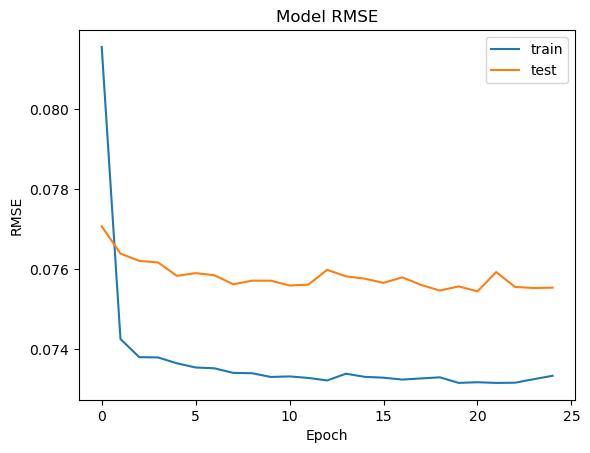

In [5]:
# List all data in history
print(history.history.keys())

# Summarize history for RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [6]:
# Generate predictions on the test set
y_pred = model.predict(x_test)

11/11 [==============================] - 0s 3ms/step


In [7]:
print('y_test shape =', y_test.shape)
###print('y_test', y_test)
print('y_pred shape =', y_pred.shape)
###print('y_pred', y_pred)

y_test shape = (352, 20)
y_pred shape = (352, 1, 20)


In [8]:
# Reshape y_test and y_pred to 2D arrays
y_test = y_test.reshape(y_test.shape[0], -1)
y_pred = y_pred.reshape(y_pred.shape[0], -1)

print('y_test shape =', y_test.shape)
###print('y_test', y_test)
print('y_pred shape =', y_pred.shape)
###print('y_pred', y_pred)

y_test shape = (352, 20)
y_pred shape = (352, 20)


In [9]:
sums = []
for row in y_test:
    sums.append(sum(row))
#print('y_test =', sums)
print("y_test average =", sum(sums)/len(sums))

y_test average = 1.0000227272727267


In [10]:
sums = []
for row in y_pred:
    sums.append(sum(row))
#print('y_pred =', sums)
print("y_pred average =", sum(sums)/len(sums))

y_pred average = 0.9873789725840073


In [11]:
# Remove values < 0.01 and Scale predictions to get 1 (100%) as a sum of each row
num_rows = len(y_pred)
num_cols = len(y_pred[0])

for row in range(num_rows):
    for col in range(num_cols):
        if y_pred[row][col] < 0.01:
            y_pred[row][col] = 0

for row in range(num_rows):
    row_sum = sum(y_pred[row])
    for col in range(num_cols):
        y_pred[row][col] = y_pred[row][col] / row_sum

In [12]:
sums = []
for row in y_pred:
    sums.append(sum(row))
#print('y_pred =', sums)
print("y_pred average =", sum(sums)/len(sums))

y_pred average = 1.0000000003704124


In [13]:
data_for_csv = df[['sex', 'age', 'state', 'risk_profile', 'invest_goals', 'temp_goals', 'fin_exp', 'fin_avail']].values
data_train, data_test = data_for_csv[:split_index], data_for_csv[split_index:]
array1 = data_test
array2 = np.round(np.array(y_pred), 3)

result_array = np.concatenate((array1, array2), axis=1)

np.set_printoptions(suppress=True)
print(result_array)

np.savetxt('LSTM_output.csv', result_array, delimiter=",", fmt='%.3f')

[[ 1. 41. 33. ...  0.  0.  0.]
 [ 1. 69. 14. ...  0.  0.  0.]
 [ 1. 46. 28. ...  0.  0.  0.]
 ...
 [ 1. 64. 24. ...  0.  0.  0.]
 [ 1. 57. 11. ...  0.  0.  0.]
 [ 0. 51. 14. ...  0.  0.  0.]]
